In [1]:
#IMPORTS
%run Functions.ipynb
%run ../datuslib.ipynb
import pandas as pd
import string
import numpy as np
import random
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import warnings
import time
import category_encoders as ce

from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder 

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 165: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 165: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 165: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 165: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 165: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 165: invalid continuation byte


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 165: invalid continuation byte

Exception ignored in: 'fiona._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 165: invalid continuation byte
PROJ: proj_create_from_database: Cannot find proj.db


In [2]:
#CARGA DATA
#negativity = pd.read_csv("../Axel/tweets_con_negatividad.csv")
train = pd.read_csv("Data/train.csv")
#train["negativity"] = negativity["negativity"]

to_predict = pd.read_csv("Data/test.csv")


### Completo cosas

In [3]:
train.fillna("Nothing", inplace= True)
features(train, to_predict)
keyword_in_text(train)

train.drop(columns=["id"], axis=1,inplace = True)

train.drop(columns=["location"], axis=1,inplace = True)

train['keyword'] = train['keyword'].str.replace('%',' ')
train['keyword'] = train['keyword'].str.replace('2','')
train['keyword'] = train['keyword'].str.replace('0','')
train.drop(columns=["text"], axis=1,inplace = True)


c:\users\hal9000\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


### Pongo algun Feature

In [4]:
train["Tiene_key_impor"] = (train["keyword"] == "wreckage") | (train["keyword"] == "debris") | (train["keyword"] == "derailment") 
#| (train["keyword"] == "outbreak") | (train["keyword"] == "oil split")\
#| (train["keyword"] == "typhoon") | (train["keyword"] == "suicide bombing") | (train["keyword"] == "suicide bomber")

train["Tiene_key_no_impor"] = (train["keyword"] == "aftershock")

from sklearn.preprocessing import LabelEncoder

# Categorical boolean mask
categorical_feature_mask = train.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = train.columns[categorical_feature_mask].tolist()
categorical_cols

le = LabelEncoder()

# apply le on categorical feature columns
train[categorical_cols] = train[categorical_cols].apply(lambda col: le.fit_transform(col))

In [5]:
x = train[train.columns.drop("target")]
y = train['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

print(f"Original shapes: X={x.shape} y={y.shape}")
print(f"Train shapes: X={x_train.shape} y={y_train.shape}")
print(f"Test  shapes: X={x_test.shape}  y={y_test.shape}")


Original shapes: X=(7613, 6) y=(7613,)
Train shapes: X=(6090, 6) y=(6090,)
Test  shapes: X=(1523, 6)  y=(1523,)


In [6]:
x.head(10)

,keyword,len,word_count,contains_keyword,Tiene_key_impor,Tiene_key_no_impor
0,0,0.246429,0.240741,False,False,False
1,0,0.135714,0.129630,False,False,False
2,0,0.475000,0.407407,False,False,False
3,0,0.232143,0.166667,False,False,False
4,0,0.314286,0.314815,False,False,False
5,0,0.392857,0.333333,False,False,False
6,0,0.339286,0.259259,False,False,False
7,0,0.210714,0.277778,False,False,False
8,0,0.282143,0.222222,False,False,False
9,0,0.185714,0.185185,False,False,False


### Fit

In [7]:
k = list(range(2,40))
prueba = pd.DataFrame(k,index=k,columns=["Kactual"])

In [8]:
dists = [
"euclidean",
"manhattan",
"chebyshev"]
knn_best_distance(prueba,dists,x_train,y_train,x_test,y_test)

euclidean --------------------------
con k:  2
Entrenamiento: 84.3514%
Testeo: 71.8976%.
F1 score: 0.7190.
   
con k:  3
Entrenamiento: 84.0066%
Testeo: 72.1602%.
F1 score: 0.7216.
   
con k:  4
Entrenamiento: 81.0509%
Testeo: 72.8825%.
F1 score: 0.7288.
   
con k:  5
Entrenamiento: 80.7389%
Testeo: 74.3926%.
F1 score: 0.7439.
   
con k:  6
Entrenamiento: 79.7865%
Testeo: 74.2613%.
F1 score: 0.7426.
   
con k:  7
Entrenamiento: 79.1461%
Testeo: 73.9987%.
F1 score: 0.7400.
   
con k:  8
Entrenamiento: 78.4072%
Testeo: 73.8674%.
F1 score: 0.7387.
   
con k:  9
Entrenamiento: 78.0131%
Testeo: 74.3270%.
F1 score: 0.7433.
   
con k:  10
Entrenamiento: 77.6355%
Testeo: 73.3421%.
F1 score: 0.7334.
   
con k:  11
Entrenamiento: 77.0115%
Testeo: 74.7209%.
F1 score: 0.7472.
   
con k:  12
Entrenamiento: 76.9458%
Testeo: 73.9987%.
F1 score: 0.7400.
   
con k:  13
Entrenamiento: 76.5189%
Testeo: 73.4734%.
F1 score: 0.7347.
   
con k:  14
Entrenamiento: 76.5517%
Testeo: 73.7360%.
F1 score: 0.7374.


Entrenamiento: 73.7274%
Testeo: 73.6047%.
F1 score: 0.7360.
   
con k:  35
Entrenamiento: 73.6782%
Testeo: 72.8825%.
F1 score: 0.7288.
   
con k:  36
Entrenamiento: 73.5796%
Testeo: 73.4077%.
F1 score: 0.7341.
   
con k:  37
Entrenamiento: 73.2348%
Testeo: 72.6198%.
F1 score: 0.7262.
   
con k:  38
Entrenamiento: 72.8900%
Testeo: 72.8168%.
F1 score: 0.7282.
   
con k:  39
Entrenamiento: 72.8079%
Testeo: 72.8825%.
F1 score: 0.7288.
   


(40, -0.1)

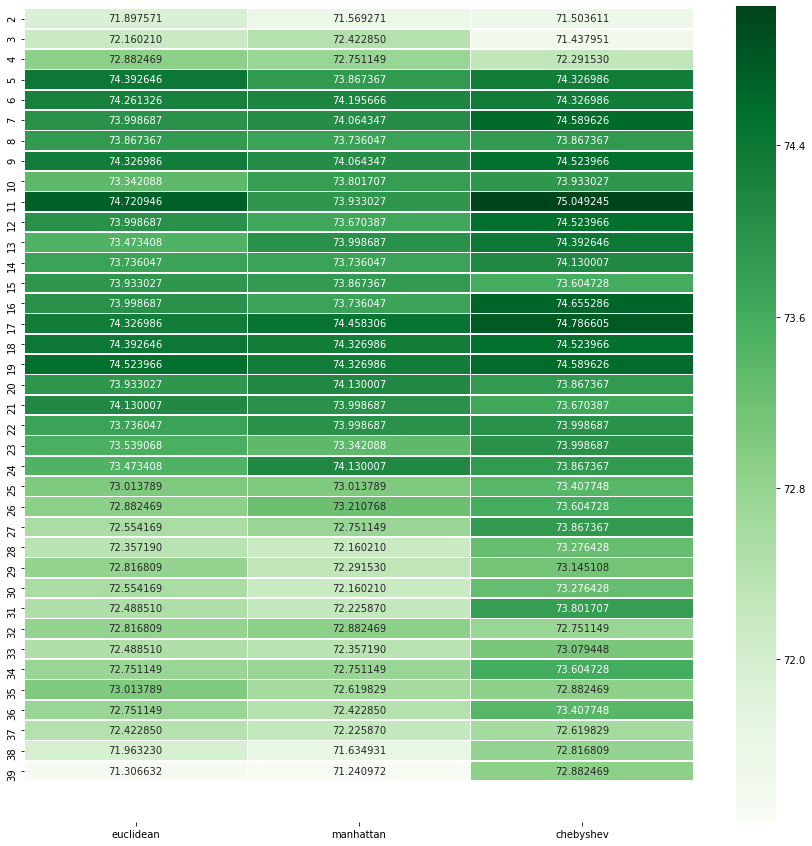

In [9]:
prueba.drop(columns="Kactual",inplace=True)

a= prueba.transform(lambda x: x*100)
plt.figure(figsize=(15, 15))

sns.heatmap(a, annot=True, fmt='.6f', linewidths=.5,cmap="Greens").set_ylim(40,-0.1)

In [630]:
#context = Context(data = to_predict)

In [631]:
#to_predict.fillna("Nothing", inplace= True)
#to_predict['negativity'] = to_predict.apply(lambda row : getTweetNegativity(row,context), axis = 1)
#to_predict.to_csv('tweets_con_negatividad_to_predict.csv')

### Completo Features

In [10]:
to_predict.fillna("Nothing", inplace= True)
keyword_in_text(to_predict)

ids = to_predict["id"]

to_predict.drop(columns=["id"], axis=1,inplace = True)
to_predict.drop(columns=["location"], axis=1,inplace = True)

to_predict['keyword'] = to_predict['keyword'].str.replace('%',' ')
to_predict['keyword'] = to_predict['keyword'].str.replace('2','')
to_predict['keyword'] = to_predict['keyword'].str.replace('0','')

#importance(to_predict)
to_predict.drop(columns=["text"], axis=1,inplace = True)

c:\users\hal9000\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [11]:
to_predict["Tiene_key_impor"] = (to_predict["keyword"] == "wreckage") | (to_predict["keyword"] == "debris")\
| (to_predict["keyword"] == "derailment")
#| (to_predict["keyword"] == "outbreak")\
#| (to_predict["keyword"] == "oil split") | (to_predict["keyword"] == "typhoon") \
#| (to_predict["keyword"] == "suicide bombing") | (to_predict["keyword"] == "suicide bomber")

to_predict["Tiene_key_no_impor"] = (to_predict["keyword"] == "aftershock")

# Categorical boolean mask
categorical_feature_mask = to_predict.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = to_predict.columns[categorical_feature_mask].tolist()
categorical_cols

le = LabelEncoder()

# apply le on categorical feature columns
to_predict[categorical_cols] = to_predict[categorical_cols].apply(lambda col: le.fit_transform(col))

In [12]:
to_predict

,keyword,len,word_count,contains_keyword,Tiene_key_impor,Tiene_key_no_impor
0,0,0.121429,0.176471,False,False,False
1,0,0.228571,0.264706,False,False,False
2,0,0.342857,0.558824,False,False,False
3,0,0.142857,0.117647,False,False,False
4,0,0.160714,0.235294,False,False,False
...,...,...,...,...,...,...
3258,0,0.196429,0.235294,False,False,False
3259,0,0.496429,0.676471,False,False,False
3260,0,0.196429,0.176471,False,False,False
3261,0,0.232143,0.205882,False,False,False


In [14]:
#Resultado de test
knn = KNeighborsClassifier(n_neighbors = 11, metric="chebyshev")

#Entreno con todo el dataset
knn.fit(x, y)

#Predigo la data
predict = knn.predict(to_predict)
predict

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [15]:
comprobar(predict)

F1 Score:  0.7201961385228317


## Predicciones reales

In [635]:
test_labels = pd.read_csv("Data/perfect_submission.csv")
test_labels = test_labels["target"]

### Resultado

In [636]:
#Resultado de test
best_mtr=""
best_k=0
best_f1=0
best_predict = []
for metr in dists:
    for i in range(2,40):
        knn = KNeighborsClassifier(n_neighbors =i, metric=metr)
        #Entreno con todo el dataset
        knn.fit(x, y)

        #Predigo la data
        predict = knn.predict(to_predict)
        predict
    
        f1=f1_score(test_labels, predict,average='micro')
        if (f1 > best_f1):
            best_f1 = f1
            best_k  = i
            best_mtr = metr
            best_predict= predict
        #print (metr," k: ",i," F1 Score: ", f1)



In [637]:
print ("Mejor: metrica: ",best_mtr, ", K = ",best_k, ", F1 = ",best_f1)

Mejor: metrica:  chebyshev , K =  28 , F1 =  0.7318418633159668


### Compruebo el F1 Score

In [582]:
 print ("F1 Score: ", f1_score(test_labels, best_predict,average='micro'))

F1 Score:  0.7376647257125345


### Guardo Submission

In [584]:
result = submission_output(ids, best_predict,"KNN vxx k=xx.csv")
result

,id,target
0,0,0
1,2,1
2,3,1
3,9,0
4,11,1
...,...,...
3258,10861,1
3259,10865,1
3260,10868,1
3261,10874,1
